Let's begin by loading the `plotnine` module; call it `p9` for convenience.

In [0]:
import plotnine as p9

We'll also need `pandas` (call it `pd`):

In [0]:
import pandas as pd

We'll want to connect to the shared Google Drive to get access to our data. Remember, this is always done the same way:

In [3]:
# mount google drive 
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Now load the LABEVENTS.csv and PATIENTS.csv data from MIMIC:

In [0]:
labevents = pd.read_csv("/content/gdrive/My Drive/[YCMI_CBDS Summer Course] Data/mimic_iii/LABEVENTS.csv")
patients = pd.read_csv("/content/gdrive/My Drive/[YCMI_CBDS Summer Course] Data/mimic_iii/PATIENTS.csv")

Take a look at both datasets to get a sense of how it is structured:

In [5]:
labevents

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
0,6244563,10006,NaN,50868,2164-09-24 20:21:00,19,19.00,mEq/L,NaN
1,6244564,10006,NaN,50882,2164-09-24 20:21:00,27,27.00,mEq/L,NaN
2,6244565,10006,NaN,50893,2164-09-24 20:21:00,10.0,10.00,mg/dL,NaN
3,6244566,10006,NaN,50902,2164-09-24 20:21:00,97,97.00,mEq/L,NaN
4,6244567,10006,NaN,50912,2164-09-24 20:21:00,7.0,7.00,mg/dL,abnormal
...,...,...,...,...,...,...,...,...,...
76069,20452679,44228,103379.0,51250,2170-12-24 04:09:00,88,88.00,fL,NaN
76070,20452680,44228,103379.0,51265,2170-12-24 04:09:00,595,595.00,K/uL,abnormal
76071,20452681,44228,103379.0,51277,2170-12-24 04:09:00,14.5,14.50,%,NaN
76072,20452682,44228,103379.0,51279,2170-12-24 04:09:00,2.76,2.76,m/uL,abnormal


In [6]:
patients

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1
...,...,...,...,...,...,...,...,...
95,31838,44083,M,2057-11-15 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,1
96,31853,44154,M,1878-05-14 00:00:00,2178-05-15 00:00:00,2178-05-15 00:00:00,2178-05-15 00:00:00,1
97,31867,44212,F,2078-06-16 00:00:00,2124-01-29 00:00:00,NaN,2124-01-29 00:00:00,1
98,31870,44222,M,2107-06-27 00:00:00,2182-08-03 00:00:00,2182-08-03 00:00:00,NaN,1


In the `labevents` dataframe, the `charttime` column represents date and time. Use `pd.to_datetime` to tell the computer this:

In [0]:
labevents['charttime'] = pd.to_datetime(labevents['charttime'])

### Bar chart

Let's start simply: Make a bar chart showing the `gender` data from `patients`. You should end up with two bars: one for `M` one for `F`. Which gender is more common in our dataset?

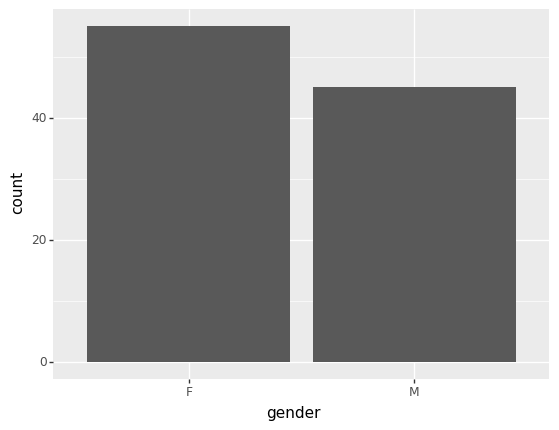

<ggplot: (8759821758461)>

In [10]:
p9.ggplot(patients) + p9.geom_bar(p9.aes(x="gender"))

### Time series

Select blood potassium concentration in mEq/L (`itemid == 50971`) for patient `40310`.


In [18]:
potassium = labevents[labevents['itemid']==50971][labevents['subject_id']==40310]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Make a line graph of the measurements (`valuenum`) vs date (`charttime`). Note that ggplot automatically handles timestamps; we do not need to do anything special for dates.

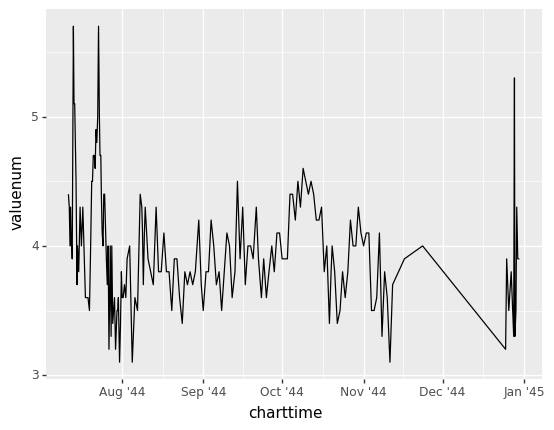

<ggplot: (8759817213665)>

In [28]:
p9.ggplot(potassium) + p9.geom_line(p9.aes(x="charttime",y="valuenum",group="subject_id")) + p9.scale_x_datetime(date_breaks="1 month",date_labels="%b '%y")

Did you give your graph meaningful x- and y-axis labels? If not, redo it but with labels "Date" for the x-axis and "[K] (mEq/L)" for the y-axis (you'll want to use `p9.labs`).

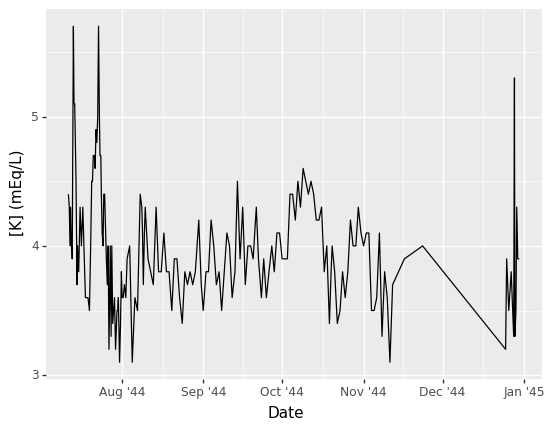

<ggplot: (-9223363277038830290)>

In [53]:
p9.ggplot(potassium) + p9.geom_line(p9.aes(x="charttime",y="valuenum",group="subject_id")) + p9.labs(x="Date",y="[K] (mEq/L)") + p9.scale_x_datetime(date_breaks="1 month",date_labels="%b '%y")

How do you interpret the graph between mid-November and late December? Are there any time periods that stand out as not being like the rest?

**Something along the lines of being irregular, but differently irregular than July, October or January, as those show peaks rather than major periodicity changes (and therefore stand out as being not like the rest)**

### Box plot

So far we've seen how one particular person's blood potassium concentration changed over time.

Let's instead try to get a sense of the variability of blood sodium concentrations (`labevents['itemid'] == 50983`) within individuals but also how individuals compare. To do this, we'll use a boxplot (`geom_boxplot`). Specifically, make a boxplot that `group`s by `subject_id`, plots the concentrations (`valuenum`) along the y-axis, and positions the box across the x-axis beased on `subject_id`. To keep the graph readable, only include data for `subject_id < 20000`.

In [45]:
sodium = labevents[labevents['itemid']==50983][labevents['subject_id']<20000]
sodium['subject_id'] = sodium['subject_id'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


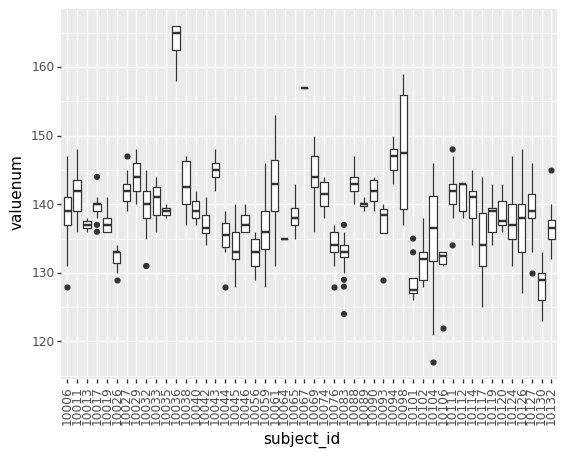

<ggplot: (-9223363277038614300)>

In [46]:
p9.ggplot(sodium) + p9.geom_boxplot(p9.aes(x="subject_id",y="valuenum",group="subject_id")) + p9.theme(axis_text_x=p9.element_text(angle=90))

Did you see any patients whose blood sodium levels seem unusual relative to the rest? (e.g. unusually high, unusually low, or unusually variable).

- high mean: 10036, 10067
- high variability: 10098, 100104


### Scatter plot

Let's load the population data from the Pima Indian diabetes dataset:




In [0]:
diabetes = pd.read_csv('/content/gdrive/My Drive/[YCMI_CBDS Summer Course] Data/diabetes.csv')

As always, start by looking at the data to get a sense of what it contains:

In [48]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Make a scatter plot showing the relationship of `Glucose` and `Insulin` in the `diabetes` data.


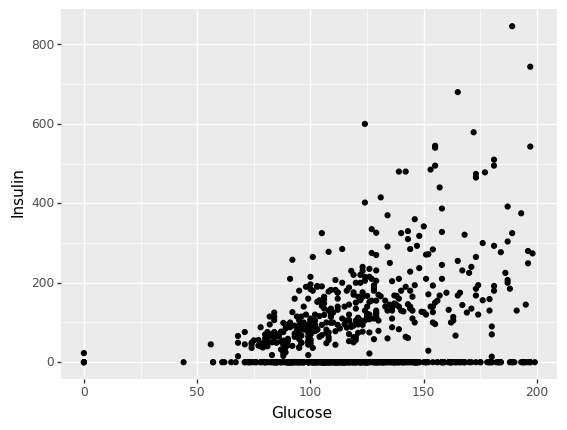

<ggplot: (8759816015571)>

In [49]:
p9.ggplot(diabetes,p9.aes(x="Glucose",y="Insulin")) + p9.geom_point()

You can see that there are a lot of times where insulin has a zero value. Let's filter those out and continue.

In [0]:
diabetes_insulin = diabetes[diabetes['Insulin']!=0]

There are so many points, it's hard to see where the most likely values are in the basic scatter plot. To get a better sense, add a `p9.geom_density_2d` to overlay a contour map of the point density. Specify a `color` so that it stands out:

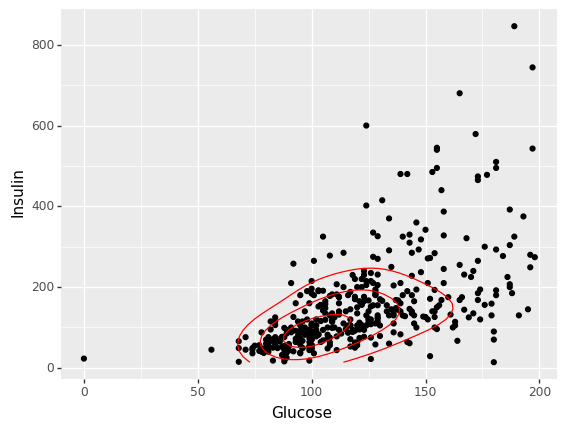

<ggplot: (8759816792005)>

In [51]:
p9.ggplot(diabetes_insulin,p9.aes(x="Glucose",y="Insulin")) + p9.geom_point() + p9.geom_density_2d(color='red')

Finally, let's add a smoothed curve `p9.geom_smooth` showing the overall trend. Again, specify a color so that you can see the trend curve:

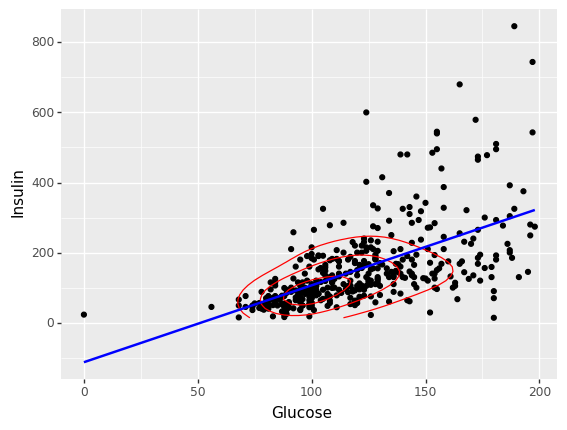

<ggplot: (-9223363277038777256)>

In [52]:
p9.ggplot(diabetes_insulin,p9.aes(x="Glucose",y="Insulin")) + p9.geom_point() + p9.geom_density_2d(color='red') + p9.geom_smooth(method='lm',color='blue',se=False)